In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
#from cls_algo import CustomStrategy
from avalanche.benchmarks.classic import SplitMNIST,SplitFMNIST
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
import torchvision
import pickle
from avalanche.benchmarks.datasets import MNIST, FashionMNIST, KMNIST, EMNIST, \
QMNIST, FakeData, CocoCaptions, CocoDetection, LSUN, ImageNet, CIFAR10, \
CIFAR100, STL10, SVHN, PhotoTour, SBU, Flickr8k, Flickr30k, VOCDetection, \
VOCSegmentation, Cityscapes, SBDataset, USPS, HMDB51, UCF101, \
CelebA, CORe50Dataset, TinyImagenet, CUB200, OpenLORIS

from avalanche.benchmarks.generators import nc_benchmark, ni_benchmark
from torchvision.transforms import Compose, ToTensor, Normalize, RandomCrop
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

from avalanche.benchmarks.utils import AvalancheDataset
import time
import torch
import torch.nn.functional as F
from torch.nn import BCELoss
from tqdm import tqdm
from collections import OrderedDict

import torch
import numpy as np
from typing import Tuple
from torchvision import transforms
import pandas as pd
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchmetrics import Accuracy
from sklearn.metrics import mean_absolute_error

c:\Users\mcgyv\anaconda3\envs\VenvSynapNet_Application\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("dataset/Known_data/BP_SensorData.csv")

In [9]:
df[df['object'] == "solid_square"].shape[0]/150

50.0

In [2]:
a = torch.load("models/stable_model.pth")

In [5]:
a.dictionary['models.linear1']

TypeError: 'ukDatasetModel' object is not subscriptable

In [3]:
tactileData = pd.read_csv("dataset/Known_data/BP_SensorData.csv", sep=",")

In [4]:
# for i in range(150):
#     if i != df['Iterations'][i]:
#         print(df['Iterations'][i])

In [5]:
# df['Iterations'].unique()

In [6]:
# tactileData = pd.read_csv("BP_SensorData.csv")
# #tactileData.drop(columns=["grab_obj","dim"], axis=1, inplace=True)
# tactileData.head()

In [7]:
print("Total data is ", tactileData.shape)
print("Independent objects ", tactileData['object'].unique(), "Number", tactileData['object'].unique().shape)
print("Number of data per object (ball)", tactileData[tactileData['object']=="ball"].shape[0]/150)
print("Number of data per object (fevistick)", tactileData[tactileData['object']=="fevistick"].shape[0]/150)
print("Number of data per object (rectangular_cuboid)", tactileData[tactileData['object']=="rectangular_cuboid"].shape[0]/150)

Total data is  (135000, 6)
Independent objects  ['cube' 'ball' 'airpod_case' 'stapler' 'usb_connector' 'bottle_cap'
 'bottle' 'solid_cylinder' 'fevistick' 'smart_watch' 'rubiks_cube'
 'airpods' 'rfid_card' 'rectangular_cuboid' 'hollow_cylinder'] Number (15,)
Number of data per object (ball) 60.0
Number of data per object (fevistick) 60.0
Number of data per object (rectangular_cuboid) 60.0


In [8]:
tactileData['SensorVal1'][tactileData['object']=="ball"]

9000     0.02
9001     0.00
9002     0.00
9003     0.00
9004     0.00
         ... 
17995    5.00
17996    5.00
17997    5.00
17998    5.00
17999    5.00
Name: SensorVal1, Length: 9000, dtype: float64

In [9]:
# ## plotting the fs1 vs fsr2 for ball
# x_fsr1Ball = tactileData['fsr1'][tactileData['obj']=="ball"]
# y_fsr1Ball = tactileData['fsr2'][tactileData['obj']=="ball"]
# plt.scatter(x_fsr1Ball, y_fsr1Ball)

In [10]:
# ## plotting the fs1 wrt time for ball
# x_time = tactileData['time'][tactileData['obj']=="ball"]
# y_fsr1Ball = tactileData['fsr1'][tactileData['obj']=="ball"]
# y_fsr2Ball = tactileData['fsr2'][tactileData['obj']=="ball"]
# plt.scatter(x_time, y_fsr1Ball)
# plt.scatter(x_time, y_fsr2Ball)

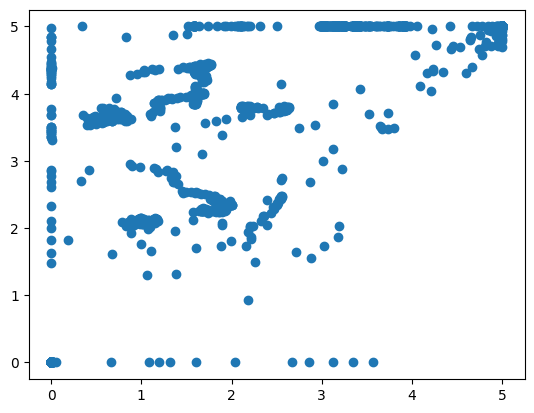

In [11]:
## plotting the cs1 vs cs2 for ball (curling)
x_fsr1Ball = tactileData['SensorVal1'][tactileData['object']=="ball"]
y_fsr1Ball = tactileData['SensorVal2'][tactileData['object']=="ball"]
plt.scatter(x_fsr1Ball, y_fsr1Ball)

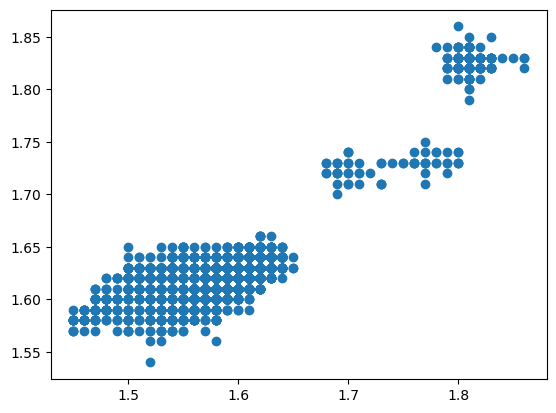

In [8]:
## plotting the cs1 vs cs2 for ball (curling)
x_fsr1Ball = tactileData['SensorVal3'][tactileData['object']=="ball"]
y_fsr1Ball = tactileData['SensorVal4'][tactileData['object']=="ball"]
plt.scatter(x_fsr1Ball, y_fsr1Ball)

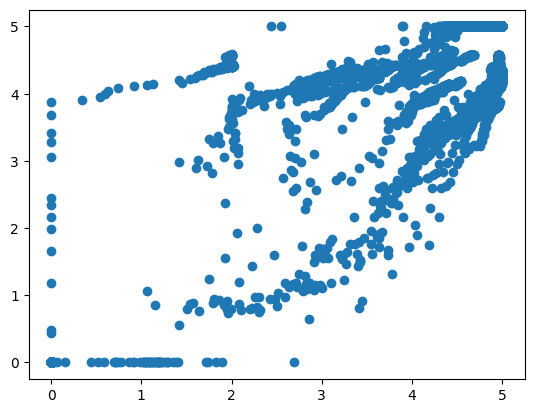

In [9]:
## plotting the cs1 vs cs2 for ball (curling)
x_fsr1Ball = tactileData['SensorVal1'][tactileData['object']=="smart_watch"]
y_fsr1Ball = tactileData['SensorVal2'][tactileData['object']=="smart_watch"]
plt.scatter(x_fsr1Ball, y_fsr1Ball)

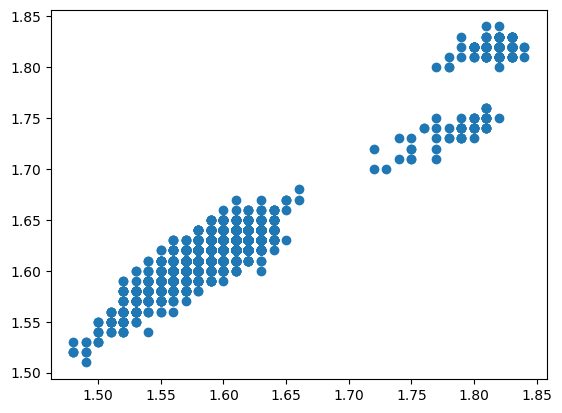

In [10]:
## plotting the cs1 vs cs2 for ball (curling)
x_fsr1Ball = tactileData['SensorVal3'][tactileData['object']=="smart_watch"]
y_fsr1Ball = tactileData['SensorVal4'][tactileData['object']=="smart_watch"]
plt.scatter(x_fsr1Ball, y_fsr1Ball)

In [11]:
# ## plotting the fs1 wrt time for ball
# x_time = tactileData['time'][tactileData['obj']=="ball"]
# y_cs1Ball = tactileData['cs1'][tactileData['obj']=="ball"]
# y_cs2Ball = tactileData['cs2'][tactileData['obj']=="ball"]
# plt.scatter(x_time, y_cs1Ball)
# plt.scatter(x_time, y_cs2Ball)

In [12]:
def normalizer(data):
    zeroOneRange = ((data-data.min())/(data.max()-data.min()))
    minusOneOneRange = zeroOneRange
    # minusOneOneRange = (zeroOneRange - 0.5)/0.5
    return minusOneOneRange

In [13]:
# X = tactileData.drop(columns=['iteration','time','obj'])
# X = np.array(X).astype("float32")
# y = tactileData['obj']

In [14]:
# labels = ['ball','bigball','box','button','case','cube', 'cylinder','jenga',
#  'labello', 'lemon', 'metalbrick', 'smallbutton', 'smallcube', 'syringe',
#  'tomato']
# encoded_y = []
# for i in range(len(labels)):
#     for j in range(len(y)):
#         if y[j] == labels[i]:
#             encoded_y.append(i)

# encoded_y = np.array(encoded_y)

In [13]:
from torch.utils.data import DataLoader, Subset
from torch.utils.data import Dataset
class CustomDatasetForDataLoader(Dataset):
    def __init__(self,data,targets):
        # convet labels to 1 hot
        self.data = data
        self.targets = targets
            
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx],self.targets[idx]

In [14]:
tactileData['object'].unique()

array(['cube', 'ball', 'airpod_case', 'stapler', 'usb_connector',
       'bottle_cap', 'bottle', 'solid_cylinder', 'fevistick',
       'smart_watch', 'rubiks_cube', 'airpods', 'rfid_card',
       'rectangular_cuboid', 'hollow_cylinder'], dtype=object)

In [15]:
## we keep the solid cylinder, solid cube, and rectangular_cuboidfor testing phase
labels = ['cube', 'ball', 'airpod_case', 'stapler', 'usb_connector','bottle_cap', 'bottle', 'solid_cylinder', 'fevistick',
       'smart_watch', 'rubiks_cube', 'airpods', 'rfid_card', ] ### ---> Dummy encoded to integers

##'rectangular_cuboid', 'hollow_cylinder'
modifiedData = []
modifiedLabels = []
for i in range(len(labels)):
    dataToTransform = np.array(tactileData.loc[tactileData['object'] == labels[i], ['SensorVal1', 'SensorVal2', 'SensorVal3', 'SensorVal4']])
    for j in range(0,dataToTransform.shape[0],150):
        tempTrans = dataToTransform[j:j+150].reshape(1,-1)
        modifiedLabels.append(i)
        modifiedData.append(tempTrans)
    print("All transformations done for experiences in train and test!!!")

modifiedLabels = np.array(modifiedLabels)
modifiedData = np.array(modifiedData).squeeze(1)
print(modifiedData.shape)

All transformations done for experiences in train and test!!!
All transformations done for experiences in train and test!!!
All transformations done for experiences in train and test!!!
All transformations done for experiences in train and test!!!
All transformations done for experiences in train and test!!!
All transformations done for experiences in train and test!!!
All transformations done for experiences in train and test!!!
All transformations done for experiences in train and test!!!
All transformations done for experiences in train and test!!!
All transformations done for experiences in train and test!!!
All transformations done for experiences in train and test!!!
All transformations done for experiences in train and test!!!
All transformations done for experiences in train and test!!!
(780, 600)


In [16]:
# test_labels = ['cube', 'solid_cylinder', 'rectangular_cuboid']
# ExpDataSep = []
# ExpLabelsSep = []
# for i in range(len(labels)):
#     dataToTransform = np.array(tactileData.loc[tactileData['object'] == labels[i], ['SensorVal1', 'SensorVal2', 'SensorVal3', 'SensorVal4']])
#     for j in range(0,dataToTransform.shape[0],150):
#         tempTrans = dataToTransform[j:j+150].reshape(1,-1)
#         ExpLabelsSep.append(i)
#         ExpDataSep.append(tempTrans)
#     print("All transformations done for separate test data!!!")

# ExpLabelsSep = np.array(ExpLabelsSep)
# ExpDataSep = np.array(ExpDataSep).squeeze(1)
# print(ExpDataSep)

In [17]:
train_indices, val_indices, _, _ = train_test_split(range(len(modifiedLabels)),modifiedLabels,stratify=modifiedLabels,
        test_size=0.20)
trainData = modifiedData[train_indices]
trainLabels = modifiedLabels[train_indices]

testData = modifiedData[val_indices]
testLabels = modifiedLabels[val_indices]

In [18]:
print(trainData.shape, trainLabels.shape)
print(testData.shape, testLabels.shape)

(624, 600) (624,)
(156, 600) (156,)


In [19]:
X_normalizedTrain = normalizer(trainData)
X_normalizedTest = normalizer(testData)
print(X_normalizedTrain.shape)
print(X_normalizedTest.shape)

(624, 600)
(156, 600)


In [20]:
X_normalizedTrain = X_normalizedTrain.astype("float32")
X_normalizedTest = X_normalizedTest.astype("float32")

In [21]:
trainData = CustomDatasetForDataLoader(data=X_normalizedTrain,targets=trainLabels)
testData = CustomDatasetForDataLoader(data=X_normalizedTest,targets=testLabels)

In [22]:
X_normalizedTest.min()

0.0

In [33]:
## Simple Conv1D model
class RegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.model = nn.Sequential(OrderedDict([
            ("conv1", nn.Conv1d(in_channels=600, out_channels=512, kernel_size=3, stride=1, padding=1)),
            ("batchnorm1", nn.BatchNorm1d(num_features=512)),
            ("activation1", nn.LeakyReLU(0.01,inplace=False)),

            ("conv2", nn.Conv1d(in_channels=512, out_channels=256, kernel_size=3, stride=2, padding=1)),
            ("batchnorm2", nn.BatchNorm1d(num_features=256)),
            ("activation2", nn.LeakyReLU(0.01,inplace=False)),

            ("flatten", nn.Flatten()),
            ("linear1", nn.Linear(256, 256)),
            ("activation3", nn.LeakyReLU()),
            # nn.Linear(512, 512),
            # nn.LeakyReLU(),
            ("linear2", nn.Linear(256,13))
        ]))

    def forward(self,x):
        return self.model(x)




In [40]:
model = RegressionModel()

In [41]:
print(model)

RegressionModel(
  (model): Sequential(
    (conv1): Conv1d(600, 512, kernel_size=(3,), stride=(1,), padding=(1,))
    (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation1): LeakyReLU(negative_slope=0.01)
    (conv2): Conv1d(512, 256, kernel_size=(3,), stride=(2,), padding=(1,))
    (batchnorm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation2): LeakyReLU(negative_slope=0.01)
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (linear1): Linear(in_features=256, out_features=256, bias=True)
    (activation3): LeakyReLU(negative_slope=0.01)
    (linear2): Linear(in_features=256, out_features=13, bias=True)
  )
)


In [43]:
print(model.model.linear2.weight.shape)

torch.Size([13, 256])


In [46]:
## Simple regression model on the tactile dataset
model = RegressionModel()
opt = torch.optim.Adam(model.parameters(), 1e-4)
loss_cat = nn.CrossEntropyLoss()
EPOCHS = 20
patience = 150
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, patience=patience, verbose=True)
for epochs in range(EPOCHS):
    for data, labels in DataLoader(trainData, 32, shuffle=False):
        model.zero_grad()
        data = data.reshape(-1, 600, 1)
        predict = model(data)
        loss = loss_cat(predict, labels)
        loss.backward()
        opt.step()
    scheduler.step(loss)
    if (epochs%50) == 0:
        print(f"loss is {loss}")


## Eval
def evalComp(test_stream):
    exp_counter=0
    acc_exp=[]
    # acc_dict={}
    model.eval()
    accuracy = Accuracy(task="multiclass", num_classes=15)
    with torch.no_grad():
        eval_data_loader = DataLoader(test_stream,batch_size=32,shuffle=False)
        total_accuracy=0
        batch_counter=0
        for data,labels in tqdm(eval_data_loader):
            input_dataBT =  data     
            input_dataBT = input_dataBT.reshape(-1, 600, 1)  
            input_label = labels
            pred_test = model(input_dataBT)
            pred_label = torch.argmax(pred_test.data,1)
            total_accuracy+=accuracy(pred_label,input_label)
            batch_counter+=1

        print(f"exp {exp_counter} model accuracy : {total_accuracy/batch_counter}")
        acc_exp.append((total_accuracy/batch_counter).item())
        exp_counter+=1
    return acc_exp
evalComp(testData)

## Epochs = 2000, lr=1e-4 --> Train accuracy 91

## Epochs = 2500, lr=1e-4 --> Test accuracy 61

## Epochs = 2500, lr=1e-4 --> Test accuracy 64 (conv1d)
## Epochs = 2000, lr=1e-4 --> Test accuracy 64 (conv1d)

RuntimeError: expected scalar type Long but found Int

In [ ]:
## Vae with conv1d
class Reshape(nn.Module):
    def __init__(self,batch_sizeGR,features,seq_length, *args):
        super().__init__()
        self.shape = args
        self.batch_sizeGR = batch_sizeGR
        self.features = features
        self.seq_length = seq_length

    def forward(self, x):
        return x.reshape(self.batch_sizeGR,self.features,self.seq_length)


class Trim(nn.Module):
    def __init__(self,data_width, *args):
        super().__init__()
        self.data_width=data_width

    def forward(self, x):
        return x[:, :, :self.data_width, :self.data_width]

class VAE(nn.Module):
    def __init__(self,input_dim, latent_embedding, device):
        super().__init__()
        self.latent_embedding = latent_embedding
        self.input_dim = input_dim
        self.device = device
        # self.batch_sizeGR = batch_sizeGR
        # self.data_width=self.data_height=14
        
        self.encoder = nn.Sequential(
                # Reshape(self.batch_sizeGR,1,self.data_width,self.data_height),
                nn.Conv1d(in_channels=self.input_dim, out_channels=512, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm1d(num_features=512),
                nn.LeakyReLU(0.01,inplace=False),

                nn.Conv1d(in_channels=512, out_channels=256, kernel_size=3, stride=2, padding=1),
                nn.BatchNorm1d(num_features=256),
                nn.LeakyReLU(0.01,inplace=False),

                nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, stride=2, padding=1),
                nn.BatchNorm1d(num_features=128),
                nn.LeakyReLU(0.01,inplace=False),

                nn.Conv1d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1),
                nn.BatchNorm1d(num_features=64),
                nn.LeakyReLU(0.01,inplace=False),

                # nn.Conv1d(in_channels=self.)

                # nn.Conv2d(16, 32, stride=2, kernel_size=(3, 3), padding=1),
                # nn.BatchNorm2d(num_features=32),
                # nn.LeakyReLU(0.01,inplace=False),

                # nn.Conv2d(32, 64, stride=2, kernel_size=(3, 3), padding=1),
                # nn.BatchNorm2d(num_features=64),
                # nn.LeakyReLU(0.01,inplace=False),

                nn.Flatten(),
                # nn.Linear(1024, 1000),
                # nn.LeakyReLU(0.01,inplace=False),
                # nn.Linear(1000, 500),
        )    
        
        self.z_mean = torch.nn.Linear(64, self.latent_embedding)
        self.z_log_var = torch.nn.Linear(64, self.latent_embedding)
        
        self.decoder = nn.Sequential(
                torch.nn.Linear(self.latent_embedding, 64),
                nn.LeakyReLU(0.01,inplace=False),

                Reshape(-1, 64, 1),

                nn.ConvTranspose1d(64, 128, stride=2, kernel_size=3, padding=1),    
                nn.BatchNorm1d(num_features=128),            
                nn.LeakyReLU(0.01,inplace=False),

                nn.ConvTranspose1d(128, 256, stride=2, kernel_size=3, padding=1),  
                nn.BatchNorm1d(num_features=256),              
                nn.LeakyReLU(0.01,inplace=False),

                nn.ConvTranspose1d(256, 512, stride=2, kernel_size=3, padding=1),  
                nn.BatchNorm1d(num_features=512),              
                nn.LeakyReLU(0.01,inplace=False),

                nn.ConvTranspose1d(512, 600, stride=1, kernel_size=3, padding=1), 
                # Trim(self.data_width),  
                # nn.Sigmoid()
                nn.Tanh()
                )

    def encoding_fn(self, x):
        x = x.reshape(1, 600, 1)
        x = self.encoder(x)
        #x = x.view(1,self.image_channel_dim,-1) # resize the output of the encoder for obtaining the embedding, we are sending one image at a time
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        encoded = self.reparameterize(z_mean, z_log_var)
        return encoded, z_mean, z_log_var
        
    def reparameterize(self, z_mu, z_log_var):
        eps = torch.randn(z_mu.size(0), z_mu.size(1)).to(device=self.device)
        z = z_mu + eps * torch.exp(z_log_var/2.) 
        return z
        
    def forward(self, x):
        x = self.encoder(x)
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        encoded = self.reparameterize(z_mean, z_log_var)
        decoded = self.decoder(encoded)
        # # decoded_reshaped = decoded.reshape(self.batch_sizeGR,-1)
        # # print("decoder output",decoded_reshaped.shape)
        return encoded, z_mean, z_log_var, decoded

In [ ]:
class Vae_Cls_Generator:
  def __init__(self,num_epochs, model, device,learning_rate,batch_size,patience,reconstruction_term_weight=1):
    self.num_epochs = num_epochs
    self.device = device
    self.model =  model.to(self.device) 
    self.patience = patience
    self.seq_len = 1
    self.loss_fn = F.mse_loss

    self.reconstruction_term_weight = reconstruction_term_weight
    self.learning_rate = learning_rate
    self.batch_size = batch_size

  def train(self,cl_exp,synthetic_imgHeight=None,synthetic_imgWidth=None,buff_images=[]):
    optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)  
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=self.patience, verbose=True)

    train_dataset = cl_exp.dataset
    train_loader = DataLoader(train_dataset, num_workers=4, batch_size=self.batch_size,shuffle=False)
    for epoch in range(self.num_epochs):
        self.model.train()
        loader_loop = tqdm(train_loader,leave=False)
        for data in loader_loop:
          features = data[0].to(self.device) 
          # if len(buff_images) > 0:
          #   buffer_images = torch.as_tensor(np.array(buff_images))
          #   buffer_images = buffer_images.squeeze(2).reshape(-1,1,synthetic_imgHeight,synthetic_imgWidth).to(self.device)
          #   features = buffer_images
          features = features.reshape(-1, 600, self.seq_len)

          # FORWARD AND BACK PROP
          encoded, z_mean, z_log_var, decoded = self.model(features)

          '''
          negative sign to make the KL div loss to be positive.
          '''
          kl_div = -0.5 * torch.sum(1 + z_log_var 
                                    - z_mean**2 
                                    - torch.exp(z_log_var), 
                                    axis=1) # sum over latent dimension

          batchsize = kl_div.size(0)
          kl_div = kl_div.mean() # average over batch dimension

          pixelwise = self.loss_fn(decoded, features, reduction='none')  # check with reduction ="mean"
          pixelwise = pixelwise.view(batchsize, -1).sum(axis=1) # sum over pixels
          pixelwise = pixelwise.mean() # average over batch dimension
          loss = self.reconstruction_term_weight*pixelwise + kl_div
          
          optimizer.zero_grad()

          loss.backward()

          # UPDATE MODEL PARAMETERS
          optimizer.step()
          loader_loop.set_description(f"Epoch {epoch}/{self.num_epochs}")
          loader_loop.set_postfix(loss = loss.item())

        scheduler.step(loss)

  def evaluate(self):
    pass

In [ ]:
from torchvision.utils import save_image
def buffer_dataGeneration(digit, exp,device, batch_size,model,num_examples,numbOf_orgExamples):

    images = []
    synthetic_imgs = []
    labelsForSyntheticImages = []
    batch_size = batch_size
    idx = 0
    constraining_term = 1#0.15
    originalImage_example = 0

    data = exp.dataset
    dataset = DataLoader(data,batch_size=batch_size,num_workers=4,shuffle=False)

    for data in dataset:
        x = data[0].to(device)
        y = data[1].cpu().detach().numpy()
        indices_img, = np.where(y==digit)
        for i in indices_img:
            images.append(x[i])
            originalImage_example += 1
            if (originalImage_example == numbOf_orgExamples):
                break
    encodings_digit = []
    model.eval()
    for i in range(numbOf_orgExamples):
        with torch.no_grad():
            _,mu, sigma = model.encoding_fn(images[i]) #.view(1, 784)
        encodings_digit.append([mu.squeeze(0).squeeze(0).cpu().detach().numpy(),
                                sigma.squeeze(0).squeeze(0).cpu().detach().numpy()])
    
    encodings_digit = np.array(encodings_digit)
    
    # take average of the mean and sigma for N examples of the same digit
    mean_encodings_digit = encodings_digit.mean(axis=0)
    
    # make the dimension of mu and sigma as its original dimension
    mu = mean_encodings_digit[0]
    mu = torch.as_tensor(mu).unsqueeze(0).unsqueeze(1).cuda()

    sigma = mean_encodings_digit[1]
    sigma = torch.as_tensor(sigma).unsqueeze(0).unsqueeze(1).cuda()
    
    #Extracting imgaes from latent embedding
    for example in range(num_examples):
        with torch.no_grad():
            epsilon = torch.randn_like(sigma)
            z = mu + (constraining_term*sigma * epsilon)
            out = model.decoder(z).cpu().detach().numpy()
        synthetic_imgs.append(out)
        labelsForSyntheticImages.append(digit)

    synthetic_imgs = np.array(synthetic_imgs)
    return synthetic_imgs, labelsForSyntheticImages

In [ ]:
# dummy_test = torch.Tensor(X_normalized[42:47]).reshape(-1, 600, 1) ## --> corresponds to ball
# syn_images, labels = buffer_dataGeneration(digit=1, data=dummy_test, device= "cuda", num_examples=1, numbOf_orgExamples=2, model=gen_model)

In [ ]:
# mean_absolute_error(syn_images.reshape(600,1), dummy_test[2])

In [ ]:
device = "cuda"
scenarioTrainVal = nc_benchmark(trainData, trainData, n_experiences=5, shuffle=False, seed=9, task_labels=False)
train_stream = scenarioTrainVal.train_stream
test_stream =  scenarioTrainVal.test_stream
gen_model = VAE(600, 100, device=device).to(device=device)
gen_class = Vae_Cls_Generator(num_epochs=3, model=gen_model, device=device, learning_rate=1e-4, batch_size=32, patience=100, )
buffer_images = []
buffer_labels = []
for exp in train_stream:
    print("Start of experience: ", exp.current_experience)
    print("Current Classes: ", exp.classes_in_this_experience)

    print("Training Generator on current experience") 
    gen_class.train(exp)
    for digit in exp.classes_in_this_experience:
        temp_img, temp_labels = buffer_dataGeneration(digit=digit, exp=exp, num_examples=30,
                                        device=device,model=gen_model, batch_size=32,numbOf_orgExamples=5)
        buffer_images.append(temp_img)
        buffer_labels.append(temp_labels)
    print("Gen training completetd")